# Zad.
Pytamy się jakie są naturalne grupy w postach. Bierzemy zbiór 20newsgroups.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### wczytaj dane

In [48]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups(subset='all', shuffle=True)#, remove=('headers', 'footers', 'quotes'))

In [49]:
twenty.description

'the 20 newsgroups by date dataset'

In [50]:
twenty.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Wypisz pierwszy post

In [51]:
print(twenty.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




ZADANIE: Zbiór jest dość duży. Weź po 50 przykładów z każdej z klas dla 5 kategorii. Wynik zapisz w

 * X_set
 * y_set
 


In [52]:
data = []
for j in range(len(twenty.target_names)):
    data.append([twenty.data[i] for i in range(twenty.target.shape[0]) if twenty.target[i] == j])

In [53]:
categories = 5

num = 50
X_set = []
y_set = []
for i in range(categories):
    X_set = X_set + data[i][:num]
    y_set = y_set + [i][:num]

In [54]:
len(y_set)

5

In [55]:
#

ZADANIE: Proszę zwektoryzować dane

In [56]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string

def preprocessing(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if not w in set(string.punctuation)]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

vectorizer = TfidfVectorizer(tokenizer = preprocessing,
                            stop_words = stopwords.words('english'),
                            min_df = 0.04,
                            max_df = 0.5,
                            lowercase = True)

X_vectors = vectorizer.fit_transform(X_set) 
X_vectors.shape

(250, 451)

# Zad. 

Wykonajmy grupowanie danych metodą hierarchiczną.

Użyj odległości:
    
   * 'euclidean'
   * 'cosine'
    


In [57]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

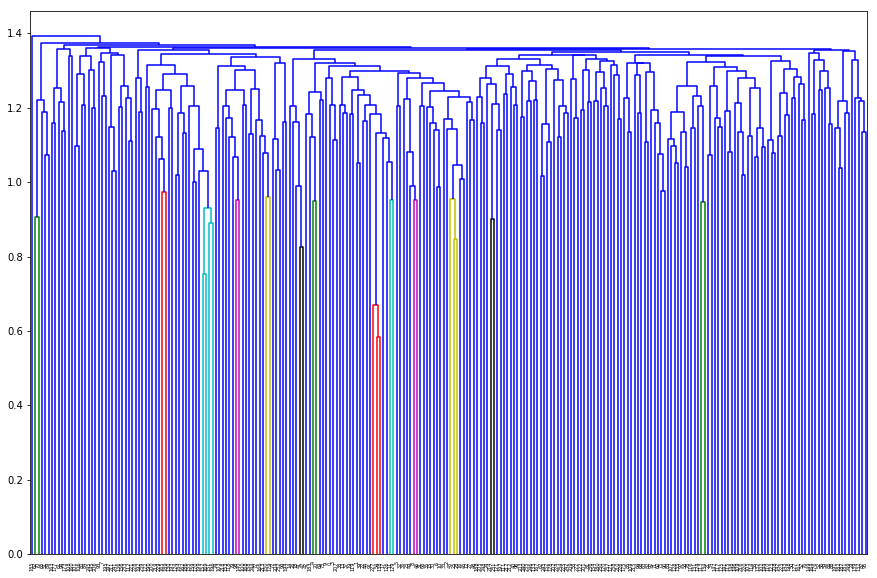

In [64]:
df = pd.DataFrame(X_vectors.todense())

plt.figure(figsize=(15, 10))
row_clusters = linkage(df.values, metric='euclidean', method='average') 
row_dendr = dendrogram(row_clusters)
#                        ,
#                        truncate_mode='lastp',  # show only the last p merged clusters
#                        p=5,  # show only the last p merged clusters
#                        show_leaf_counts=True)

plt.show()

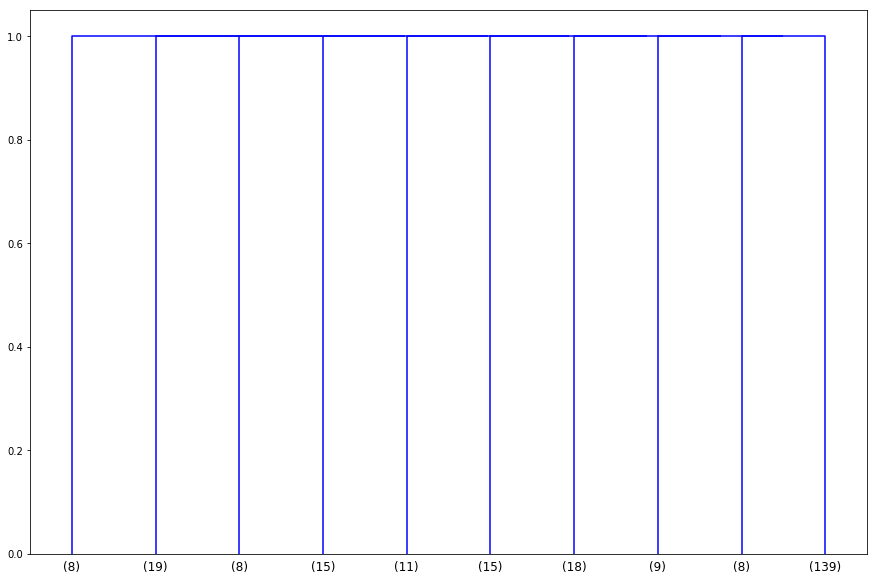

In [89]:
df = pd.DataFrame(X_vectors.todense())

plt.figure(figsize=(15, 10))
row_clusters = linkage(df.values, metric='cosine', method='complete') 
row_dendr = dendrogram(row_clusters,
                       truncate_mode='lastp',  # show only the last p merged clusters
                       p=10,  # show only the last p merged clusters
                       show_leaf_counts=True)

plt.show()

In [90]:
vectorizer.vocabulary_

{'keith': 234,
 'islam': 230,
 'wa': 428,
 'caus': 99,
 'atheism': 70,
 'case': 98,
 'univers': 413,
 '14': 13,
 'nntp-posting-host': 287,
 'articl': 66,
 'write': 443,
 'posit': 312,
 'note': 288,
 'accept': 41,
 'time': 402,
 'long': 250,
 'even': 161,
 'either': 153,
 "''": 0,
 'state': 378,
 'john': 232,
 'a.': 38,
 'year': 449,
 'say': 348,
 'christian': 104,
 'moral': 276,
 'specif': 374,
 "'d": 1,
 'like': 244,
 'know': 238,
 'two': 408,
 'peopl': 304,
 'right': 344,
 'b': 73,
 'one': 294,
 'wrong': 445,
 'though': 400,
 'pretti': 318,
 'good': 195,
 'idea': 218,
 'c': 93,
 'never': 284,
 'ani': 53,
 'inform': 224,
 'make': 257,
 'best': 82,
 'guess': 201,
 'realli': 334,
 'must': 278,
 '``': 37,
 'whether': 432,
 'better': 83,
 'question': 328,
 'need': 281,
 'discuss': 140,
 'ha': 202,
 'correct': 124,
 'answer': 55,
 'e': 150,
 'someth': 371,
 'els': 154,
 'would': 442,
 'hope': 213,
 'tell': 393,
 'actual': 44,
 'real': 333,
 'part': 302,
 'way': 430,
 'rather': 331,
 'sens'

In [91]:
X_vectors[185].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.16301376, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.25755755,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.32855207, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

# Zad 

Podziel dane na 20 grup

In [98]:
from scipy.cluster.hierarchy import fcluster

part = fcluster(row_clusters, 20, 'maxclust')

In [99]:
np.unique(part,return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20], dtype=int32),
 array([ 8, 19,  8, 15, 11, 15, 18,  9,  8, 13, 16,  6, 21,  9, 11,  8,  5,
        24,  5, 21], dtype=int64))

ZADANIE: Prosze wypisać liczności grup

In [100]:
X_dense = X_vectors.todense()

Liczności klastrów powinny być rozsądne.

Chcemy zobaczyć reprezentantów klastrów:
* średnie będą reprezentowały częstości słów
* możemy wylistować zdania będące najbliżej średnich

Wypisujemy najbardziej reprezentatywne słowa w klastrach (jakie są reprezentatywne?)

In [101]:
centers = np.zeros((20, X_dense.shape[1]))
for i in range(1, 21):
    centers[i-1] = np.mean(X_dense[part == i], axis = 0)
centers

array([[0.05990475, 0.00958753, 0.02210381, ..., 0.        , 0.0232372 ,
        0.        ],
       [0.01784532, 0.02627564, 0.00292909, ..., 0.        , 0.02008242,
        0.01440918],
       [0.        , 0.        , 0.05004829, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10591504, 0.01359858, 0.02515537, ..., 0.02977907, 0.02914461,
        0.02824069],
       [0.05393401, 0.        , 0.        , ..., 0.01716698, 0.        ,
        0.        ],
       [0.02777722, 0.02780239, 0.        , ..., 0.        , 0.        ,
        0.00474755]])

In [102]:
top = 5
for i in range(20):
    tops = np.argsort(centers[i,:])[-top:]
    print([w for w in vectorizer.vocabulary_ if vectorizer.vocabulary_[w] in tops])

['problem', 'research', '17', 'chang', 'monitor']
['wa', 'univers', 'problem', 'get', 'tech']
['know', 'ani', 'comput', 'want', 'packag']
['know', '``', 'would', 'doe', 'error']
["''", 'speed', 'video', 'card', 'fast']
['summari', 'softwar', 'product', 'port', 'network']
['articl', 'write', "''", '``', 'mac']
['keith', 'atheist', 'mac', 'color', 'ram']
['univers', 'ani', 'pc', 'network', 'printer']
['drive', 'hard', 'devic', 'scsi', 'ide']
['wa', "''", '``', "'s", 'ibm']
['nntp-posting-host', 'creat', 'window', '5', 'instal']
['look', 'address', 'memori', 'bit', 'imag']
['version', 'system', 'ftp', 'card', 'driver']
['...', 'control', 'info', 'card', 'ide']
["''", 'ha', 'list', 'system', '9']
['make', 'question', 'answer', 'busi', 'graphic']
['islam', "''", 'believ', 'god', 'atheist']
['24', 'support', 'mode', 'vesa', 'vga']
['file', 'use', 'version', 'run', 'window']


# Zad

Wypiszmy teraz posty najbardziej reprezentujące klaster (zdania najbliższe średniej)

In [12]:
#

ZADANIE: Porównaj wynik z LDA

In [13]:
#